## 결정 트리의 앙상블

+ **앙상블**: 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법
+ **랜덤 포레스트, 그레디언트 부스팅 결정 트리**


### 랜덤 포레스트

+ 결정 트리의 단점은 **과대적합**
+ 잘 작동하되 서로 다른 방향으로 과대적합된 트리를 많이 만들면 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있다.
+ 각각의 트리는 타깃예측을 잘 해야하고 다른 트리와는 구별되어야한다.
> + 트리를 랜덤하게 만드는 법
>> + 데이터 포인트를 무작위로 선택함
>> + 분할 테스트(질문)에서 특성을 무작위로 선택함 


### 랜덤 포레스트 구축
**무작위의 다른 결정 트리를 만든다**

+ 트리를 만들기 위해서 **부트스트랩 샘플**을 생성 : n_samples개의 데이터 포인트 중에서 무작위로 데이터를 n_samples만큼 추출한다.
+ 몇 개의 특성을 고를지 **max_features**로 조정하여 각 노드마다 후보 특성을 무작위로 선택
+ max_features가 낮다 -> 트리들이 많이 달라지고, 데이터에 맞추다보니 트리가 깊어짐
+ max_features가 높다 -> 트리들이 비슷해짐, 데이터에 잘 맞춰짐
+ **회귀**: 모든 트리의 예측을 평균하여 예측을 만듬
+ **분류**: 예측한 확률을 평균내어 높은 확률을 가진 클래스가 예측값


### 랜덤 포레스트 분석


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y = make_moons(n_samples = 100, noise = 0.25, random_state = 3) #데이터 만들기 
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state = 42)
forest = RandomForestClassifier(n_estimators = 5, random_state = 2)  #5개 트리로 이루어짐
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47112 missing from c

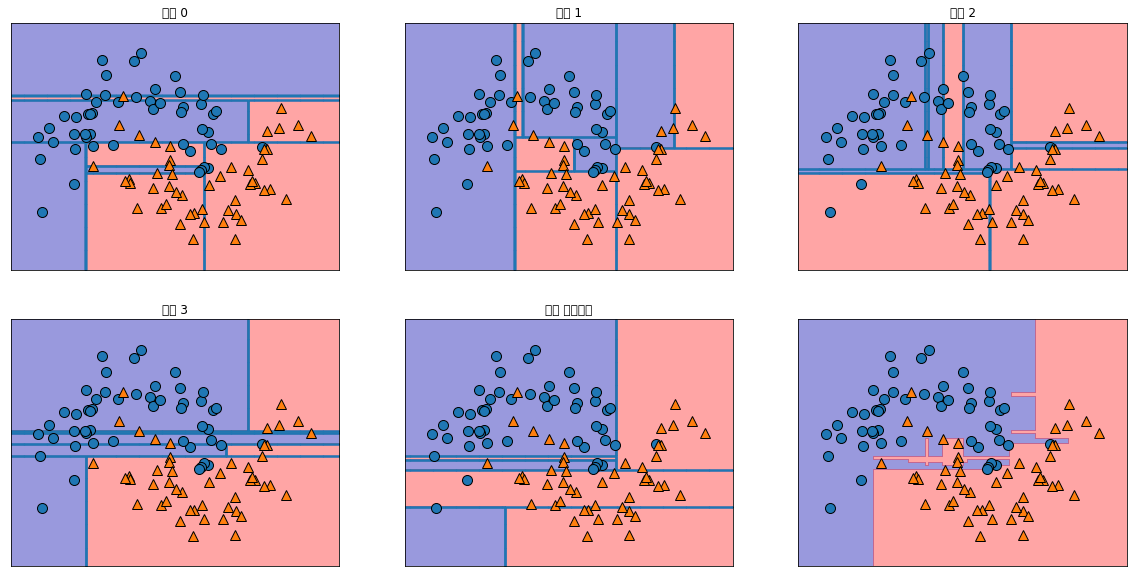

In [7]:
import matplotlib.pyplot as plt 
import mglearn

fig, axes = plt.subplots(2,3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X,y, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X, fill = True, ax = axes[-1,-1], alpha = .4)
axes[-1,1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:,0],X[:,1],y)

훈련 세트 정확도 : 1.000
테스트 세트 정확도: 0.972


C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from c

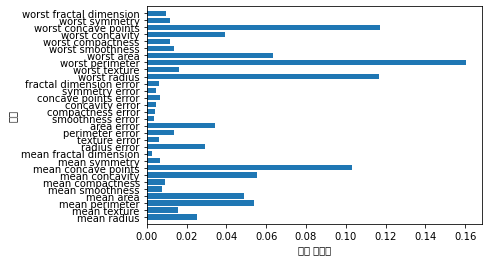

In [13]:
# 유방암 데이터셋으로 랜덤 포레스트 적용
from sklearn.datasets import load_breast_cancer
import numpy as np

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
forest = RandomForestClassifier(n_estimators=100, random_state = 0) #100개의 랜덤 트리
forest.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1] #양성, 음성
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(forest)

+ 단일 결정 트리보다 많은 특성들의 중요도가 0이상이라는 것을 확인할 수 있다. 
+ 랜덤 포레스트를 만드는 무작위성은 알고리즘이 가능성 있는 많은 경우를 고려할 수 있도록 한다.

+ n_estimators : 크면 많은 트리를 평균하게 되어 과대적합을 줄여줌
+ max_features : 작으면 과대적합을 줄여준다. 
>> + 분류 : max_features = sqrt(max_features)
>> + 회귀 : max_features = n_features


### 그레디언트 부스팅 회귀 트리

+ 이전트리의 오차를 보완하는 방식으로 순차적 트리 생성
+ 강력한 사전 가지치기의 사용
+ 얕은 트리(약한 학습기)를 많이 연결

+ **learning_rate**: 오차를 얼마나 강하게 보정할 것인지 제어 (학습률 크면 복잡한 모델)
+ **n_estimators**: 트리추가로 모델의 복잡도가 커짐


In [14]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

#훈련 세트의 정확도가 100임 --> 과대적합

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [16]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1) # 깊이를 1로
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

gbrt = GradientBoostingClassifier(random_state = 0, learning_rate = 0.01) # 깊이를 1로
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))


훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972
훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from c

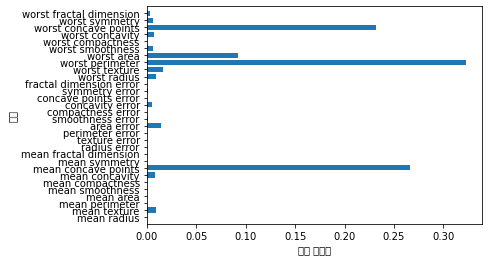

In [17]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth =1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

+ 표를 보면 그레디언트 부스팅은 **일부 특성을 완전히 무시하고 있음**
+ 보통은 안정적인 랜덤 포레스트 먼저 적용함, 시간이 중요하거나 성능을 쥐어짜야할때 그레디언트 사용

> + 훈련시간이 길다
> + 희소한 고차원 데이터에서는 잘 작동하지 않는다.
> + 랜덤 포레스트와는 달리 n_estimators를 크게하면 과대적합
> + max_dept는 가능하면 5보다 깊어지지 않도록 한다. 